Instalações que você talvez não tenha

In [2]:
%pip install opencv-python scikit-image tifffile

                                              0.0/22.8 MB ? eta -:--:--
                                              0.0/22.8 MB 1.3 MB/s eta 0:00:18
                                              0.0/22.8 MB 1.3 MB/s eta 0:00:18
                                             0.1/22.8 MB 409.6 kB/s eta 0:00:56
                                             0.1/22.8 MB 652.2 kB/s eta 0:00:35
                                             0.1/22.8 MB 554.9 kB/s eta 0:00:41
                                             0.2/22.8 MB 737.3 kB/s eta 0:00:31
                                             0.2/22.8 MB 737.3 kB/s eta 0:00:31
                                             0.2/22.8 MB 737.3 kB/s eta 0:00:31
                                             0.3/22.8 MB 780.0 kB/s eta 0:00:29
                                              0.5/22.8 MB 1.1 MB/s eta 0:00:21
                                              0.5/22.8 MB 1.1 MB/s eta 0:00:21
                                              0.5/22

Imports do projeto

In [3]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import itertools
import tifffile as tiff
from skimage import color

In [49]:
canal = 0
imagem_banda= [0,
               cv2.imread("Mapas/LC09_L2SP_223075_20220813_20230402_02_T1/LC09_L2SP_223075_20220813_20230402_02_T1_SR_B1.TIF", canal), 
               cv2.imread("Mapas/LC09_L2SP_223075_20220813_20230402_02_T1/LC09_L2SP_223075_20220813_20230402_02_T1_SR_B2.TIF", canal),
               cv2.imread("Mapas/LC09_L2SP_223075_20220813_20230402_02_T1/LC09_L2SP_223075_20220813_20230402_02_T1_SR_B3.TIF", canal),
               cv2.imread("Mapas/LC09_L2SP_223075_20220813_20230402_02_T1/LC09_L2SP_223075_20220813_20230402_02_T1_SR_B4.TIF", canal),
               cv2.imread("Mapas/LC09_L2SP_223075_20220813_20230402_02_T1/LC09_L2SP_223075_20220813_20230402_02_T1_SR_B5.TIF", canal),
               cv2.imread("Mapas/LE07_L2SP_227062_20221126_20221222_02_T1/LE07_L2SP_227062_20221126_20221222_02_T1_ST_B6.TIF", canal),
               cv2.imread("Mapas/LC09_L2SP_223075_20220813_20230402_02_T1/LC09_L2SP_223075_20220813_20230402_02_T1_SR_B7.TIF", canal)]  


Preparando variáveis e bandas

In [66]:
# Load bands
# Landsat scene ID 
ID = "LC09_L2SP_223075_20220813_20230402_02_T1" #2022
ID= "LC09_L2SP_223075_20230629_20230701_02_T1" #2023
B1 = tiff.imread('Mapas/{}/{}_SR_B1.TIF'.format(ID,ID)) #Visible Coastal Aerosol
B2 = tiff.imread('Mapas/{}/{}_SR_B2.TIF'.format(ID,ID)) #Visible Blue
B3 = tiff.imread('Mapas/{}/{}_SR_B3.TIF'.format(ID,ID)) #Visible Green
B4 = tiff.imread('Mapas/{}/{}_SR_B4.TIF'.format(ID,ID)) #Visible Red
B5 = tiff.imread("Mapas/{}/{}_SR_B5.TIF".format(ID,ID)) #Near-Infrared
B6 = tiff.imread("Mapas/{}/{}_SR_B6.TIF".format(ID,ID)) #Swir1
B7 = tiff.imread("Mapas/{}/{}_SR_B7.TIF".format(ID,ID)) #Swir2
bands = [B1,B2,B3,B4,B5,B6,B7]
band_names = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']


Observando várias bandas

In [3]:
#Definindo claridade e contraste
Gamma = 0.1
Contraste = 0.2

In [ ]:
# Generate combinations of 3 bands
combinations = list(itertools.combinations(range(len(bands)), 3))

# Generate all orders of the combinations
all_orders = []
for combo in combinations:
    orders = list(itertools.permutations(combo))
    all_orders.extend(orders)

# Loop through each combination and order
for i, combo in enumerate(all_orders):
    # Select the bands for the current combination and order
    selected_bands = [bands[band_index] for band_index in combo]
    selected_band_names = [band_names[band_index] for band_index in combo]

    # Stack and scale the selected bands
    RGB = np.dstack(selected_bands)
    RGB = np.clip(RGB * 0.0000275 - Contraste, 0, 1)
    RGB = np.clip(RGB, 0, Gamma) / Gamma

    # Display RGB image
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_axis_off()
    ax.set_title(f"Combination {i+1}: {', '.join(selected_band_names)}")
    ax.imshow(RGB)
    plt.show()

Preparando a imagem

In [22]:
%pip install mplcursors

                                              0.0/89.0 kB ? eta -:--:--
     ---------------------------------------- 89.0/89.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21077 sha256=d9261f396d9172b49639d19b794bf2a95fa60e0610a1fcd5ac408e15b1671ae4
  Stored in directory: c:\users\guimd\appdata\local\pip\cache\wheels\5d\a1\eb\b98ee80431eb8217a22381e1725048be8cd0385675b151be45
Successfully built mplcursors
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Stack and scale bands
#RGB = np.dstack((B3, B5, B7))
RGB = np.dstack((B1, B3, B2)) #Bandas RGB comum.

RGB = np.clip(RGB*0.0000275-Contraste, 0, 1)
RGB = np.clip(RGB, 0, Gamma)/Gamma

#RGB = color.rgb2gray(RGB)

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(50, 50))
ax.imshow(RGB, cmap='gray')

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# ... Seu código para gerar a imagem RGB ...

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(50, 50))
ax.imshow(RGB, cmap='gray')

# Obter as coordenadas do mouse ao clicar na imagem
def onclick(event):
    if event.button == 1:  # Clique com o botão esquerdo do mouse
        x, y = event.xdata, event.ydata
        print(f'Coordenadas: ({x:.2f}, {y:.2f})')

# Conectar o manipulador de cliques ao evento de clique do mouse
cid = fig.canvas.mpl_connect('button_press_event', onclick)

# Exibir o gráfico
plt.show()


Selecionando Parte da imagem

In [17]:
#Definindo claridade e contraste
Gamma = 0.2
Contraste = 0.35

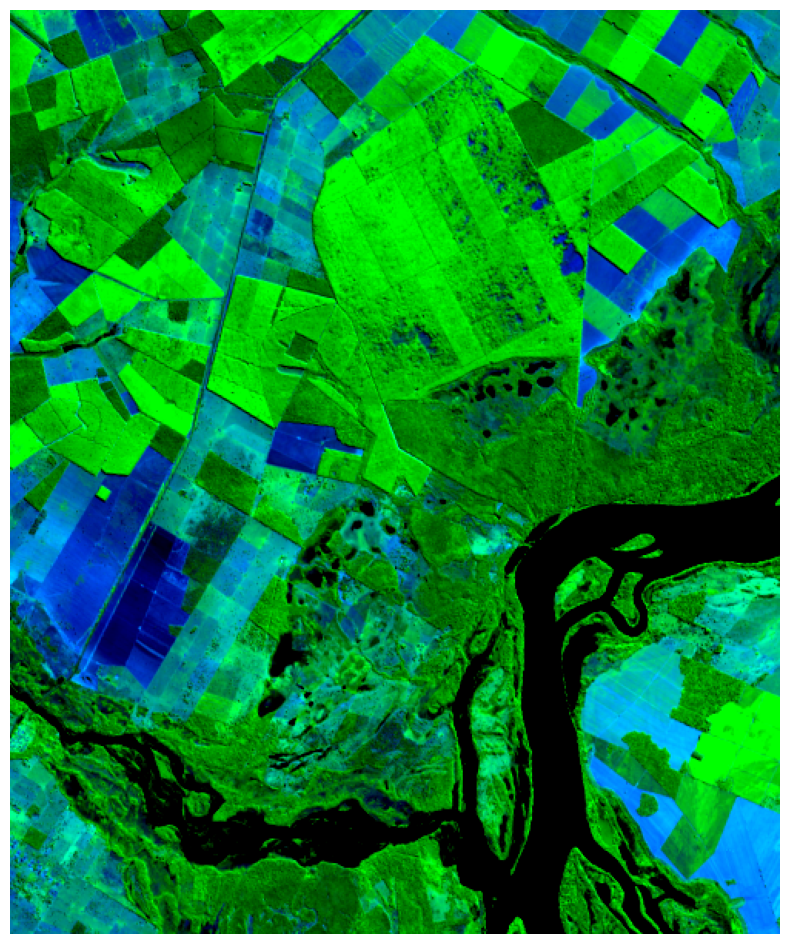

In [21]:
# Especificar as coordenadas da ROI
ymin, ymax = 1500, 2100  # coordenadas da coluna (eixo y)
#xmin, xmax = 5200, 5700  # coordenadas da linha (eixo x) 2022
xmin, xmax = 5180, 5680  # coordenadas da linha (eixo x) 2023

# Extrair a região de interesse das bandas
B4_roi = B3[ymin:ymax, xmin:xmax]
B3_roi = B5[ymin:ymax, xmin:xmax]
B2_roi = B6[ymin:ymax, xmin:xmax]

# Stack e escala das bandas da ROI
RGB_roi = np.dstack((B4_roi, B3_roi, B2_roi))
RGB_roi = np.clip(RGB_roi * 0.0000275 - Contraste, 0, 1)
RGB_roi = np.clip(RGB_roi, 0, Gamma) / Gamma

#RGB_roi = color.rgb2gray(RGB_roi)

roi_height = ymax - ymin
roi_width = xmax - xmin
figsize = (roi_width / 50, roi_height / 50)

# Display da imagem RGB da ROI
fig, ax = plt.subplots(figsize=figsize)
ax.set_axis_off()
ax.imshow(RGB_roi, cmap='gray')
#plt.imwrite("Mapas/imagem1.jpg", RGB)


plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


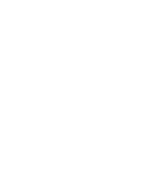

In [237]:
# Especificar as coordenadas da ROI
ymin, ymax = 100, 125  # coordenadas da coluna (eixo y)
xmin, xmax = 20, 40  # coordenadas da linha (eixo x) 2023
#xmin, xmax = 5500, 5700  # coordenadas da linha (eixo x) 2022

# Extrair a região de interesse das bandas
B4_roi = B3[ymin:ymax, xmin:xmax]
B3_roi = B5[ymin:ymax, xmin:xmax]
B2_roi = B6[ymin:ymax, xmin:xmax]

# Stack e escala das bandas da ROI
RGB_roiPic = RGB_roi[ymin:ymax, xmin:xmax]

# Display da imagem RGB da ROI
fig, ax = plt.subplots(figsize=(2,2))
ax.set_axis_off()
ax.imshow(RGB_roiPic, cmap='gray')
#plt.imwrite("Mapas/imagem1.jpg", RGB)


#plt.show()

In [67]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont

# Especificar as coordenadas da ROI
ymin, ymax = 1500, 2100  # coordenadas da coluna (eixo y)
#xmin, xmax = 5200, 5700  # coordenadas da linha (eixo x) 2022
xmin, xmax = 5180, 5680  # coordenadas da linha (eixo x) 2023

# Extrair a região de interesse das bandas
B4_roi = B3[ymin:ymax, xmin:xmax]
B3_roi = B5[ymin:ymax, xmin:xmax]
B2_roi = B6[ymin:ymax, xmin:xmax]

B4_roi = np.clip(B4_roi * 0.0000275 - Contraste, 0, 1)
B4_roi = np.clip(B4_roi, 0, Gamma) / Gamma
B3_roi = np.clip(B3_roi * 0.0000275 - Contraste, 0, 1)
B3_roi = np.clip(B3_roi, 0, Gamma) / Gamma
B2_roi = np.clip(B2_roi * 0.0000275 - Contraste, 0, 1)
B2_roi = np.clip(B2_roi, 0, Gamma) / Gamma


# Normalizar as bandas para o intervalo de 0 a 255
B4_roi = ((B4_roi - np.min(B4_roi)) / (np.max(B4_roi) - np.min(B4_roi))) * 255
B3_roi = ((B3_roi - np.min(B3_roi)) / (np.max(B3_roi) - np.min(B3_roi))) * 255
B2_roi = ((B2_roi - np.min(B2_roi)) / (np.max(B2_roi) - np.min(B2_roi))) * 255

# Criar uma nova imagem com base nas dimensões da ROI
# Definir as dimensões da imagem
largura_imagem = B4_roi.shape[1]
altura_imagem = B4_roi.shape[0]

# Definir as dimensões do espaço para as legendas
espaco_legendas = 50  # Altura do espaço para as legendas

# Criar uma nova imagem com base nas dimensões adequadas
altura_total = altura_imagem + espaco_legendas
imagem_roi = Image.new('RGB', (largura_imagem, altura_total))

# Converter as bandas para o formato PIL
B4_pil = Image.fromarray(B4_roi.astype(np.uint8))
B3_pil = Image.fromarray(B3_roi.astype(np.uint8))
B2_pil = Image.fromarray(B2_roi.astype(np.uint8))

# Combinação das bandas na imagem RGB
imagem_roi.paste(Image.merge('RGB', (B4_pil, B3_pil, B2_pil)))

# Criar um objeto de desenho na imagem
desenho = ImageDraw.Draw(imagem_roi)

# Desenho do polígono 1 #floresta
poligono1 = [(320, 300), (320, 310), (360, 310), (350, 280)] #SE, IE, ID, SD
desenho.polygon(poligono1, outline='red', fill='red')

# Desenho do polígono 2
poligono2 = [(445, 430), (440, 450), (456, 455), (460,435)] #SE, IE, ID, SD
desenho.polygon(poligono2, outline='red', fill='red')

# Desenho do polígono 3 #agricultura
poligono3 = [(146, 180), (135, 240), (165, 260), (175,200)] #SE, IE, ID, SD
desenho.polygon(poligono3, outline='blue', fill='blue')

# Desenho do polígono 4
poligono4 = [(424, 515), (422, 525), (428, 530), (430,515)] #SE, IE, ID, SD
desenho.polygon(poligono4, outline='blue', fill='blue')

# Desenho do polígono 5 #solo exposto
poligono5 = [(465, 370), (460, 400), (480, 415), (490,380)] #SE, IE, ID, SD
desenho.polygon(poligono5, outline='yellow', fill='yellow')

# Desenho do polígono 6 #solo exposto
poligono6 = [(145, 350), (125, 380), (155, 390), (175, 350)] #SE, IE, ID, SD
desenho.polygon(poligono6, outline='yellow', fill='yellow')

# Desenho do polígono 7 #solo exposto 2
poligono7 = [(400, 425), (380, 460), (425, 460), (425,420)] #SE, IE, ID, SD
desenho.polygon(poligono7, outline='gray', fill='gray')

# Desenho do polígono 8 #agua
poligono8 = [(335, 450), (340, 480), (365, 490), (350,430)] #SE, IE, ID, SD
desenho.polygon(poligono8, outline='pink', fill='pink')

tamanho_fonte = 14
fonte = ImageFont.truetype("arial.ttf", tamanho_fonte) 

# Legenda para polígono 1 (água)
posicao_legenda1 = (30, altura_imagem + 17)
texto_legenda1 = "Água"
legendaAgua = [(10, altura_imagem+20), (10, altura_imagem+30), (25, altura_imagem+30), (25,altura_imagem+20)] #SE, IE, ID, SD
desenho.polygon(legendaAgua, outline='pink', fill='pink')
desenho.text(posicao_legenda1, texto_legenda1, font=fonte)

# Legenda para polígono 2 (agricultura)
posicao_legenda2 = (100, altura_imagem + 17)
texto_legenda2 = "Agricultura"
legendaAgri = [(80, altura_imagem+20), (80, altura_imagem+30), (95, altura_imagem+30), (95,altura_imagem+20)] #SE, IE, ID, SD
desenho.polygon(legendaAgri, outline='blue', fill='blue')
desenho.text(posicao_legenda2, texto_legenda2, font=fonte)

# Legenda para polígono 3 (floresta)
posicao_legenda3 = (200, altura_imagem + 17)
texto_legenda3 = "Floresta"
legendaFlorest = [(180, altura_imagem+20), (180, altura_imagem+30), (195, altura_imagem+30), (195,altura_imagem+20)] #SE, IE, ID, SD
desenho.polygon(legendaFlorest, outline='red', fill='red')
desenho.text(posicao_legenda3, texto_legenda3, font=fonte)

# Legenda para polígono 4 (solo exposto)
posicao_legenda4 = (280, altura_imagem + 17)
texto_legenda4 = "Solo Exposto"
legendaSoloUm = [(260, altura_imagem+20), (260, altura_imagem+30), (275, altura_imagem+30), (275,altura_imagem+20)] #SE, IE, ID, SD
desenho.polygon(legendaSoloUm, outline='yellow', fill='yellow')
desenho.text(posicao_legenda4, texto_legenda4, font=fonte)

# Legenda para polígono 5 (solo exposto 2)
posicao_legenda5 = (390, altura_imagem + 17)
texto_legenda5 = "Solo Exposto 2"
legendaSoloDois = [(370, altura_imagem+20), (370, altura_imagem+30), (385, altura_imagem+30), (385,altura_imagem+20)] #SE, IE, ID, SD
desenho.polygon(legendaSoloDois, outline='gray', fill='gray')
desenho.text(posicao_legenda5, texto_legenda5, font=fonte)

# Salvar a imagem com os polígonos desenhados
imagem_com_poligonos = 'Mapas/imagem_com_poligonosL9_2022.png'
imagem_com_poligonos = 'Mapas/imagem_com_poligonosL9_2023.png'
imagem_roi.save(imagem_com_poligonos)


In [66]:
%pip install gdal

Note: you may need to restart the kernel to use updated packages.


In [153]:
from osgeo import gdal

# Caminho do arquivo MTL
mtl_path = "Mapas/LC09_L2SP_223075_20220813_20230402_02_T1/LC09_L2SP_223075_20220813_20230402_02_T1_MTL.xml"

# Abrir o arquivo MTL com o GDAL
dataset = gdal.Open(mtl_path)

# Obter as informações de transformação
transform = dataset.GetGeoTransform()

# Obter as coordenadas geográficas correspondentes às coordenadas da ROI
xmin_geo = transform[0] + xmin * transform[1] + ymin * transform[2]
ymax_geo = transform[3] + xmin * transform[4] + ymax * transform[5]
xmax_geo = transform[0] + xmax * transform[1] + ymax * transform[2]
ymin_geo = transform[3] + xmin * transform[4] + ymin * transform[5]

# Exibir as coordenadas geográficas correspondentes às coordenadas da ROI
print("Coordenadas geográficas correspondentes às coordenadas da ROI:")
print(f"Canto superior esquerdo: ({xmin_geo}, {ymax_geo})")
print(f"Canto inferior direito: ({xmax_geo}, {ymin_geo})")


AttributeError: 'NoneType' object has no attribute 'GetGeoTransform'

In [10]:

# Salva a imagem resultante
plt.imwrite("Mapas/LE07_L2SP_227062_20221126_20221222_02_T1/imagem_completa.jpg", RGB)

AttributeError: module 'matplotlib.pyplot' has no attribute 'imwrite'

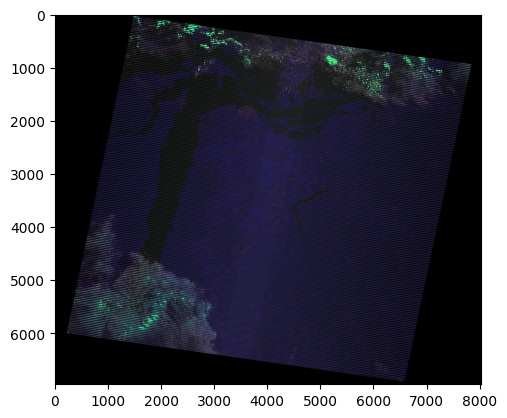

In [7]:
plt.imshow(imagem_completa)

Superior Esquerdo: -21.093923, -51.891894
Inferior Esquerdo: ,  -21.201435, -51.891894
Superior Direito: -21.093923, -51.833809
Inferior Direito: -21.201435,  -51.833809

In [42]:
import folium
import time
from selenium import webdriver

# Coordenadas dos pontos
latitudes = [-21.093923, -21.201435, -21.201435, -21.093923]
longitudes = [-51.891894, -51.891894, -51.833809, -51.833809]

# Criação do mapa
mapa = folium.Map(location=[-21.147679, -51.831212], zoom_start=13)

# Criação do retângulo semi-transparente
retangulo = folium.Rectangle(
    bounds=[[min(latitudes), min(longitudes)], [max(latitudes), max(longitudes)]],
    color='blue',
    fill=True,
    fill_color='blue',
    fill_opacity=0.3,
    weight=1  # Espessura da borda
)
mapa.add_child(retangulo)

# Salvando o mapa como HTML
mapa.save('mapa.html')

# Criando um objeto webdriver para capturar a página
driver = webdriver.Chrome()
driver.set_window_size(800, 600)

# Abrindo o mapa no navegador
driver.get('D:\Downloads\Programar\ImgClass\InpeSensoriamentoCodigo\mapa.html')  # Substitua '/path/to/' pelo caminho completo para o arquivo 'mapa.html'

# Aguardando o mapa ser carregado
time.sleep(2)

# Salvando uma captura de tela do mapa
driver.save_screenshot('mapa_screenshot.png')

# Fechando o navegador e finalizando o driver
driver.quit()
